In [32]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [33]:
''' parameters '''
# yaw of cube in gazebo
rot = 0.5 

# hfov of kinect_ros in gazebo
hfov = 0.8

In [34]:
# rotation matrix for changing yaw
rotation_matrix = np.array([[np.cos(rot), -np.sin(rot), 0],[np.sin(rot), np.cos(rot), 0],[0, 0, 1]])
print(rotation_matrix)

[[ 0.87758256 -0.47942554  0.        ]
 [ 0.47942554  0.87758256  0.        ]
 [ 0.          0.          1.        ]]


In [35]:
# cube vertecies
vs = np.array([[ 0.5,  0.5, 0], 
               [ 0.5, -0.5, 0],
               [-0.5,  0.5, 0],
               [-0.5, -0.5, 0],
               [ 0.5,  0.5, 1],
               [ 0.5, -0.5, 1],
               [-0.5,  0.5, 1],
               [-0.5, -0.5, 1]]
               )
vs = np.transpose(vs)

# cube certecies after changing yaw
vertex_prime = np.matmul(rotation_matrix, vs)

zero_point = np.reshape([3, 0, 0], (3, 1)) # center of cube
camera_pos = np.reshape([0, 0, 0.5], (3, 1)) # camera position

# cube vertecies coords under world frame
world_coords = zero_point - camera_pos + vertex_prime 

rot_to_cam = np.array([[ 0, -1, 0],
                       [ 0,  0, -1],
                       [ 1,  0, 0]])

# cube vertecies coods under camera frame
camera_coords = np.matmul(rot_to_cam, world_coords)

print("\ncoordinates of cube vertices under world frame\n\n", world_coords.transpose())
print("\ncoordinates of cube vertices under camera frame\n\n", camera_coords.transpose())


coordinates of cube vertices under world frame

 [[ 3.19907851  0.67850405 -0.5       ]
 [ 3.67850405 -0.19907851 -0.5       ]
 [ 2.32149595  0.19907851 -0.5       ]
 [ 2.80092149 -0.67850405 -0.5       ]
 [ 3.19907851  0.67850405  0.5       ]
 [ 3.67850405 -0.19907851  0.5       ]
 [ 2.32149595  0.19907851  0.5       ]
 [ 2.80092149 -0.67850405  0.5       ]]

coordinates of cube vertices under camera frame

 [[-0.67850405  0.5         3.19907851]
 [ 0.19907851  0.5         3.67850405]
 [-0.19907851  0.5         2.32149595]
 [ 0.67850405  0.5         2.80092149]
 [-0.67850405 -0.5         3.19907851]
 [ 0.19907851 -0.5         3.67850405]
 [-0.19907851 -0.5         2.32149595]
 [ 0.67850405 -0.5         2.80092149]]


In [41]:
img = cv2.imread('hfov0.8_1.png')
print(img.shape)
#'hfov0.8_1.png' cube yaw = 0.5
#'hfov0.8_2.png' cube yaw = 0.3

(480, 640, 3)


In [42]:
# http://sdformat.org/spec?ver=1.7&elem=sensor#lens_intrinsics
# https://enphotonics.com/camera-calculator/

img_width = img.shape[1]
img_height = img.shape[0]

# calculate vertical fov from hfov, height and width
vfov = np.arctan(np.tan(hfov/2)/img_width*img_height)*2 # derive from hfov 
fx = (img_width * 0.5)/np.tan(hfov*0.5)
fy = (img_height * 0.5)/np.tan(vfov*0.5)
print(fx, fy)

756.8711744125153 756.8711744125153


In [43]:
camera_intrinsic = np.array([[fx, 0 , img_width/2 ],
                             [0 , fy, img_height/2],
                             [0 , 0 , 1           ]])

In [44]:
#test = np.array([0, 0, 3]).transpose()
print(camera_coords[0])
pixel_pos = np.matmul(camera_intrinsic, camera_coords)
#float_array.astype(int)

[-0.67850405  0.19907851 -0.19907851  0.67850405 -0.67850405  0.19907851
 -0.19907851  0.67850405]


[159.4724745  358.29518589   1.        ]
[360.9614302  342.87757796   1.        ]
[255.09496025 403.0136754    1.        ]
[503.34685906 375.11110139   1.        ]
[159.4724745  121.70481411   1.        ]
[360.9614302  137.12242204   1.        ]
[255.09496025  76.9863246    1.        ]
[503.34685906 104.88889861   1.        ]


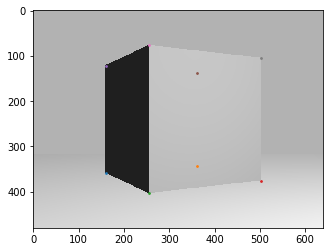

In [45]:

plt.imshow(img)
for row in pixel_pos.transpose():
    row[0] /= row[2]
    row[1] /= row[2]
    row[2] /= row[2]
    print(row)
    plt.scatter([row[0]], [row[1]], s = 3)
plt.show()